In [5]:
from emojify.nn_manager import NNManager
from emojify.first_data import load_sentiment_data
import emojify.example_net as example_net
import torch
import emojify.utils as utils

20000
ExampleNet(
  (word_embeddings): Embedding(17097, 128)
  (relu): ReLU()
  (lstm): LSTM(1024, 128, num_layers=2, batch_first=True)
  (linear1): Linear(in_features=128, out_features=512, bias=True)
  (hidden2tag): Linear(in_features=512, out_features=6, bias=True)
)
---- Epoch 0 of 10 ----


 54%|█████▍    | 544/1000 [00:02<00:01, 267.14it/s]

Epoch: 0, Batches per seconds: 265.91, Global step:    500, Validation Loss: 1.72, Validation Accuracy: 0.353


100%|██████████| 1000/1000 [00:03<00:00, 291.93it/s]


Epoch: 0, Batches per seconds: 292.51, Global step:   1000, Validation Loss: 1.70, Validation Accuracy: 0.353
---- Epoch 1 of 10 ----


 53%|█████▎    | 534/1000 [00:01<00:01, 253.72it/s]

Epoch: 1, Batches per seconds: 304.68, Global step:   1500, Validation Loss: 1.69, Validation Accuracy: 0.353


100%|██████████| 1000/1000 [00:03<00:00, 330.52it/s]


Epoch: 1, Batches per seconds: 310.18, Global step:   2000, Validation Loss: 1.69, Validation Accuracy: 0.353
---- Epoch 2 of 10 ----


 55%|█████▍    | 549/1000 [00:01<00:01, 270.98it/s]

Epoch: 2, Batches per seconds: 311.47, Global step:   2500, Validation Loss: 1.69, Validation Accuracy: 0.353


100%|██████████| 1000/1000 [00:03<00:00, 319.05it/s]


Epoch: 2, Batches per seconds: 313.05, Global step:   3000, Validation Loss: 1.69, Validation Accuracy: 0.353
---- Epoch 3 of 10 ----


 52%|█████▏    | 519/1000 [00:01<00:01, 242.75it/s]

Epoch: 3, Batches per seconds: 313.64, Global step:   3500, Validation Loss: 1.69, Validation Accuracy: 0.353


100%|██████████| 1000/1000 [00:03<00:00, 323.60it/s]


Epoch: 3, Batches per seconds: 315.25, Global step:   4000, Validation Loss: 1.69, Validation Accuracy: 0.353
---- Epoch 4 of 10 ----


 53%|█████▎    | 526/1000 [00:01<00:01, 240.62it/s]

Epoch: 4, Batches per seconds: 316.13, Global step:   4500, Validation Loss: 1.69, Validation Accuracy: 0.353


100%|█████████▉| 999/1000 [00:03<00:00, 323.31it/s]

Epoch: 4, Batches per seconds: 316.85, Global step:   5000, Validation Loss: 1.69, Validation Accuracy: 0.353
Early stop criteria met
Early stopping.


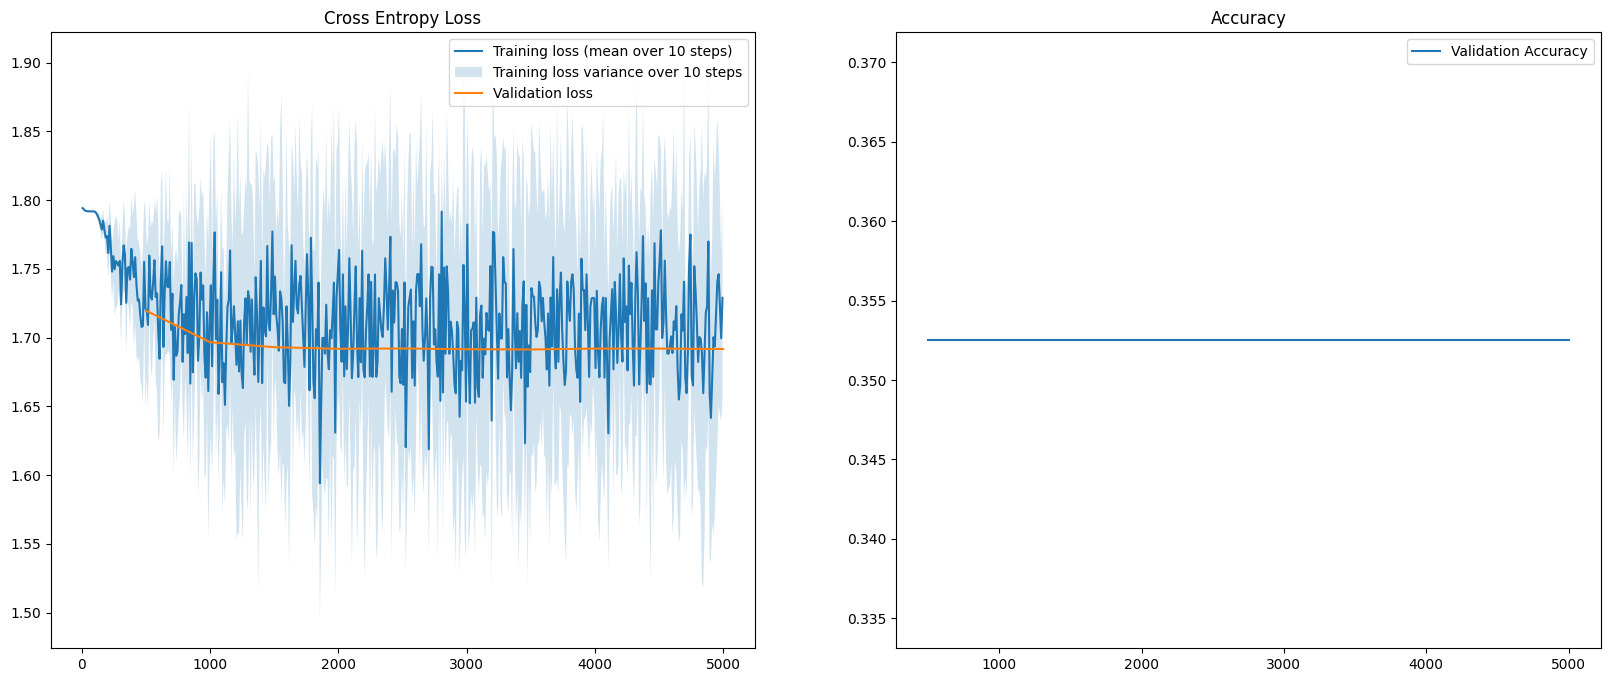

In [6]:
# Set the random generator seed (parameters, shuffling etc).
# You can try to change this and check if you still get the same result!
utils.set_seed(0)
embedding_dim = 8  # should probably be 32
hidden_dim = 128  # should probably be 32
epochs = 10
batch_size = 16
learning_rate = 5e-3
early_stop_count = 4
train, val, test, word_to_idx, label_to_idx = load_sentiment_data(batch_size, embedding_dim)
model = example_net.ExampleNet(
    batch_size,
    embedding_dim,
    hidden_dim,
    vocab_size=len(word_to_idx),
    label_count=len(label_to_idx),
)
nn_manager = NNManager(
    batch_size, learning_rate, early_stop_count, epochs, model, (train, val, test)
)
nn_manager.train()

In [7]:
accuracy = nn_manager.test()
accuracy

100%|██████████| 125/125 [00:00<00:00, 1150.54it/s]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       581
           1       0.35      1.00      0.51       693
           2       0.00      0.00      0.00       227
           3       0.00      0.00      0.00       290
           4       0.00      0.00      0.00       132
           5       0.00      0.00      0.00        77

    accuracy                           0.35      2000
   macro avg       0.06      0.17      0.09      2000
weighted avg       0.12      0.35      0.18      2000




c:\Users\ugioh\code\emojify\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ugioh\code\emojify\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ugioh\code\emojify\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3465